In [1]:
from sklearn.cluster import KMeans
import numpy as np
import re
import pandas as pd
import seaborn as sns
import sklearn
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx


In [3]:
path = "/media/vince/Postdoc/PixelDB"

In [4]:
f = open(path+"/other_files/all_pairwise_TM.dat")
content = f.readlines()
f.close()

In [5]:

#Load maximal pdb length
#3DCOMB was making some weird results
#It is being replace by deepaling, that apparentrly don't do that

PDBLen = dict()
for l in content:
    sp = l.split(" ")
    #print(sp)
    if (len(sp) != 6):
        print(sp)
        continue
    #if sp[0] != sp[1]:
    #    continue
    
    m = re.search("ALI:(\d+)",sp[3])
    match = int(m.group(1))
    alllen = [0,0]
    m = re.search("TOT1:(\d+)",sp[4])
    alllen[0] = int(m.group(1))
    
    m = re.search("TOT2:(\d+)",sp[5])
    alllen[1] = int(m.group(1))
    
    for i in range(0,2):
        if sp[i] not in PDBLen:
            PDBLen[sp[i]] = 0
        if PDBLen[sp[i]] < alllen[i]:
            PDBLen[sp[i]] = alllen[i]
    
    

In [6]:
AllTM = dict() #All TM
G=nx.Graph()
for l in content:
    #if not re.search("_.. ",l):
    #    continue
    #print(l)
    sp = l.split(" ")
    if (len(sp) != 6):
        print(sp)
        continue
    m = re.search("ALI:(\d+)",sp[3])
    match = int(m.group(1))
    
    m = re.search("TOT1:(\d+)",sp[4])
    len1 = int(m.group(1))
    
    m = re.search("TOT2:(\d+)",sp[5])
    len2 = int(m.group(1))
    
    #Check len, some old 3DCOMB artefact, leave it for the show
    if (len1 != PDBLen[sp[0]]):
        print(len1,PDBLen[sp[0]],sp)
        len1 = PDBLen[sp[0]]
    if (len2 != PDBLen[sp[1]]):
        print(len2 ,PDBLen[sp[1]],sp)
        len2 = PDBLen[sp[1]]
        
    #We want the worst TM 
    maxl = np.max([len1,len2])
    if maxl == 0:
        maxl = 10
        match = 0
        iden = 0
    TM = float(match) / maxl

    #Set the matrix
    for i in range(0,2):
        if sp[i] not in AllTM:
            G.add_node(sp[i])
            AllTM[sp[i]] = dict()
            AllTM[sp[i]][sp[i]] = 1.0
    if sp[1] == sp[0]:
        AllTM[sp[0]][sp[1]] = 1.0
        continue
    #Check some stuff
    if sp[1] in AllTM[sp[0]]:
        print(TM,AllTM[sp[0]][sp[1]])
    if sp[0] in AllTM[sp[1]]:
        print(TM,AllTM[sp[1]][sp[0]])        
    #Set TM
    if TM > 0.8:
        G.add_edge(sp[0],sp[1])
        G.add_edge(sp[1],sp[0])
        #break
    AllTM[sp[0]][sp[1]] = TM
    AllTM[sp[1]][sp[0]] = TM
    
    #break

In [7]:
Gi = G.copy()

In [8]:
#Build Datafram
DistDF = 1-pd.DataFrame(AllTM).fillna(0)
print(len(DistDF))

2536


In [9]:
G = Gi.copy()
AllCluster = []
AllName = []
ToPrint = []
for i in range(0,len(G.nodes())):
    MaxClique = []
    MaxSize = 0
    for cl in list(nx.find_cliques(G)):
        if len(cl) > MaxSize:
            MaxSize = len(cl)
            MaxClique = cl
    if MaxSize > 10:
        print(len(MaxClique))
    ToPrint += MaxClique
    #if (len(MaxClique)) == 1:
    #    break
    #sns.clustermap(DistDF[MaxClique].transpose()[MaxClique],vmax=1.0)
    plt.show()
    AllCluster.append(MaxClique)
    AllName += MaxClique
    for no in MaxClique:
        G.remove_node(no)
    if (len(G.nodes()) == 0):
        break

380
197
138
101
62
41
38
35
32
32
31
31
31
29
27
26
26
25
22
22
19
19
17
16
15
15
14
12
12
12
11
11
11
11


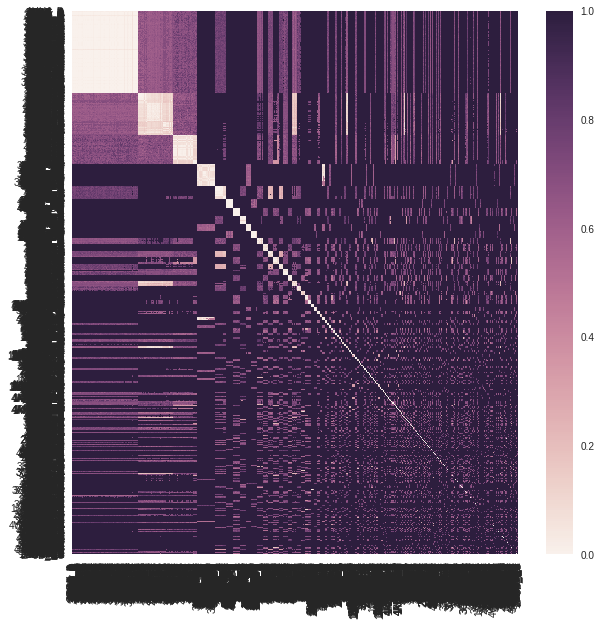

In [10]:
figsize(10,10)
sns.heatmap(DistDF[ToPrint].transpose()[ToPrint],vmax=1.0,vmin=0,)
plt.show()

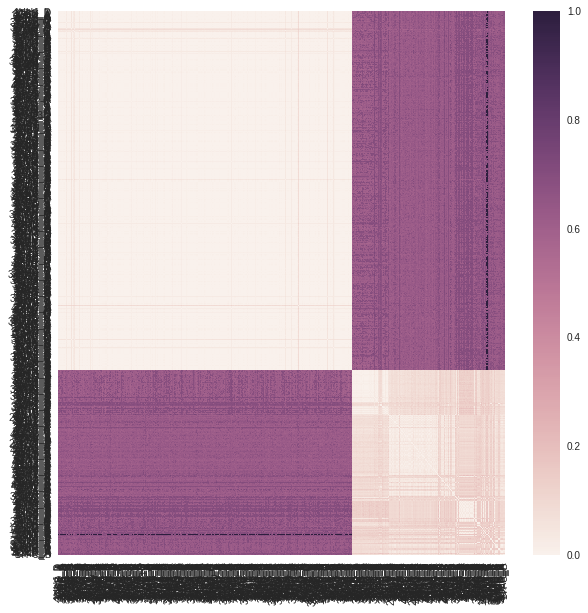

In [11]:
for clu1 in AllCluster:
    if (len(clu1) < 20):
        continue
    for clu2 in AllCluster:
        if clu1 == clu2:
            continue
        if (len(clu2) < 20):
            continue
        if (len(clu2) > len(clu1)):
            continue
        sns.heatmap(DistDF[clu1+clu2].transpose()[clu1+clu2],vmax=1.0,vmin=0)
        plt.show()
        break
    break


In [12]:
print(len(AllCluster))
print(AllCluster[-1])
print(AllCluster[0])

486
['2P6B_AC']
['1HHJ_D', '3TBS_D', '3GSX_A', '4G9D_A', '1MHC_A', '2VAA_A', '1T1X_A', '3LKS_A', '4U1L_D', '1B0G_D', '3VCL_A', '3TBW_G', '3LKQ_A', '1VAD_A', '4PRE_A', '1BII_A', '3RWE_A', '3TBY_J', '3PWJ_D', '2ZOK_E', '4E0R_D', '2ZOK_G', '1S9W_A', '3VH8_A', '3GSR_A', '1JPG_A', '3VFW_A', '1FZJ_A', '4G42_D', '3BW9_A', '3KPQ_A', '4U1I_A', '2CIK_A', '1X7Q_A', '3LKO_A', '4F7M_D', '1KPV_A', '2AXG_A', '3TIE_D', '4ZUV_D', '2AXF_A', '4WDI_D', '3QUL_J', '3VJ6_A', '2MHA_C', '2BSS_A', '1AGD_A', '1S7W_J', '1T1W_A', '3GSU_A', '3BZE_G', '3MRD_A', '3RWG_A', '1T0M_D', '2V2W_A', '1IM3_A', '3CZF_A', '1K8D_A', '4U1H_A', '3MR9_A', '3GSO_A', '3ECB_A', '1FZO_A', '3P9M_D', '2CLZ_A', '1K5N_A', '3IXA_D', '1KPU_A', '2DYP_A', '3MRI_A', '1YN6_A', '2RFX_A', '3RL1_A', '4JFP_D', '3MGT_J', '1HSA_D', '3WLB_A', '3BO8_A', '4HWZ_A', '4WU5_D', '2VLL_A', '4ZUU_A', '3V5D_D', '2GTZ_D', '3D25_A', '1JGE_A', '1A1O_A', '2NW3_A', '3X11_A', '1S7X_J', '3VFV_A', '1JGD_A', '4HX1_A', '2HN7_A', '3OX8_D', '3ROO_C', '4PRD_A', '3LN5_A', '3F

In [12]:
path
f = open(path+"other_files/cluster.dat","w")
CluNum = 1
for clu in AllCluster:
    f.write(str(CluNum))
    for c in clu:
        f.write(" "+str(c))
    f.write("\n")
    CluNum += 1
f.close()